In [1]:
cd matlab
pwd
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
format compact

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eglm03-textbook/03/5/matlab'


In [2]:
G = tf(1,[1 0 0]);  

In [3]:
H = tf(1,1);

In [4]:
GH=series(G,H)


GH =


   1


  ---


  s^2


Continuous-time transfer function.



In [5]:
s1 = -2 + 2j;

In [6]:
a0 = 8/3;

In [7]:
m_s1=abs(s1),  p_s1 = (angle(s1)*180/pi + 90) % degrees 

m_s1 =
    2.8284


p_s1 =
   225


In [8]:
[numGH,denGH] = tfdata(GH,'v');GHs1=polyval(numGH,s1)/polyval(denGH,s1)

GHs1 =
   0.0000 + 0.1250i


In [9]:
mGHs1=abs(GHs1)

mGHs1 =
    0.1250


In [10]:
pGHs1=angle(GHs1)*180/pi - 180 % degrees

pGHs1 =
   -90


In [11]:
beta = p_s1*pi/180
psi = pGHs1*pi/180  % radians

beta =
    3.9270


psi =
   -1.5708


In [12]:
a1 = (sin(beta) + a0*mGHs1*sin(beta - psi))/(m_s1*mGHs1*sin(psi))  
b1 = (sin(beta + psi) + a0*mGHs1*sin(beta))/(-(m_s1)*sin(psi))  

a1 =
    2.6667


b1 =
    0.1667


In [13]:
numD = [a1, a0], denD = [b1, 1]  

numD =
    2.6667    2.6667


denD =
    0.1667    1.0000


In [14]:
Kc = a1/b1, z0 = a0/a1, p0 = 1/b1  

Kc =
   16.0000


z0 =
     1


p0 =
    6.0000


In [15]:
D = tf(Kc*[1, z0],[1, p0])  


D =


  16 s + 16


  ---------


    s + 6


Continuous-time transfer function.



In [16]:
Go = series(D,GH)  


Go =


   16 s + 16


  -----------


  s^3 + 6 s^2


Continuous-time transfer function.



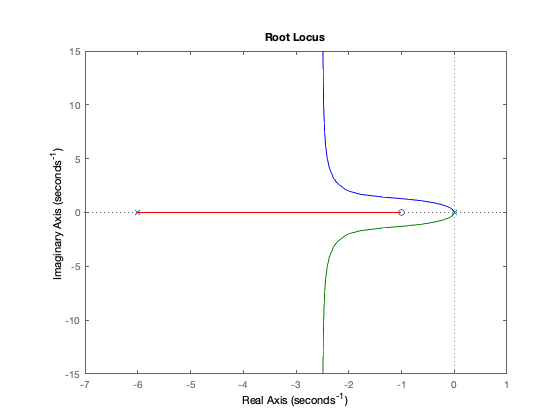

In [17]:
rlocus(Go) 

In [18]:
DG=series(D,G)  
Gc=feedback(DG,H)  


DG =


   16 s + 16


  -----------


  s^3 + 6 s^2


Continuous-time transfer function.




Gc =


         16 s + 16


  -----------------------


  s^3 + 6 s^2 + 16 s + 16


Continuous-time transfer function.



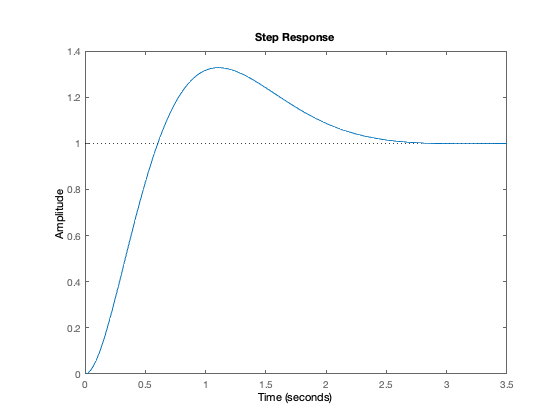

In [19]:
step(Gc)  